In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)

from utils.visualization import plot_median_errorbars

In [15]:
## get parameters
with open('../_data/fig-parameters-language-models/BERT.pkl', 'rb') as file:
    params = pickle.load(file)

## BERT-small models
with open('../_data/fig-symmetry-training-layers/BERT-small-encoder.pkl', 'rb') as file:
    models = pickle.load(file)

BERT_small_encoder_score = [np.array(models[key]) for key in list(models.keys())]
BERT_small_encoder_par = [11201594 for k in range(len(BERT_small_encoder_score))]

with open('../_data/fig-symmetry-training-layers/BERT-small-decoder.pkl', 'rb') as file:
    models = pickle.load(file)

BERT_small_decoder_score = [np.array(models[key]) for key in list(models.keys())]
BERT_small_decoder_par = [11201594 for k in range(len(BERT_small_decoder_score))]

## BERT-base models
with open('../_data/fig-symmetry-training-layers/BERT-base-encoder.pkl', 'rb') as file:
    models = pickle.load(file)

BERT_encoder_score = [np.array(models[key]) for key in list(models.keys())]
BERT_encoder_par = [params['BERT-base'][0] for k in range(len(BERT_encoder_score))]

with open('../_data/fig-symmetry-training-layers/BERT-base-decoder.pkl', 'rb') as file:
    models = pickle.load(file)

BERT_decoder_score = [np.array(models[key]) for key in list(models.keys())]
BERT_decoder_par = [params['BERT-base'][0] for k in range(len(BERT_encoder_score))]

## JIGSAW Dataset - 0.8 GB
## English Wikipedia dataset (https://huggingface.co/datasets/legacy-datasets/wikipedia) - 20.28 GB
## Red pajama dataset -  around ~ 3000GB

datasets = [0.8e9, 11.68e9, 3000e9]

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:76: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


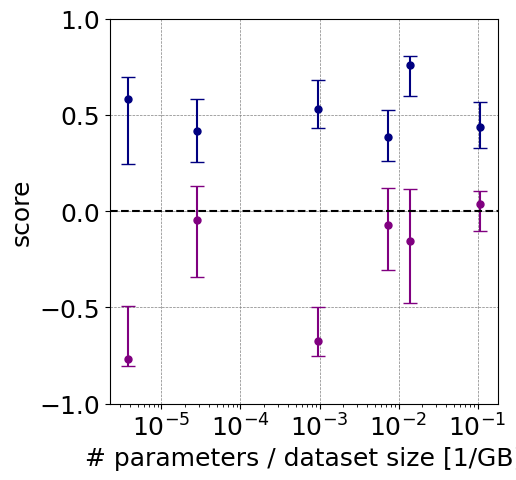

In [18]:
plt.figure(figsize=(5, 5))

plot_median_errorbars(np.array(BERT_encoder_par) / np.array(datasets), BERT_encoder_score, color = 'navy')
plot_median_errorbars(np.array(BERT_small_encoder_par) / np.array(datasets), BERT_small_encoder_score, color = 'navy')

plot_median_errorbars(np.array(BERT_decoder_par) / np.array(datasets), BERT_decoder_score, color = 'purple')
plot_median_errorbars(np.array(BERT_small_decoder_par) / np.array(datasets), BERT_small_decoder_score, color = 'purple')

plt.axhline(y=0,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(-1,1)
plt.ylabel('score')
plt.xlabel('# parameters / dataset size [1/GB]')

plt.savefig('../figures/fig-overparameterization-custom-models.pdf', format='pdf', dpi=300)